# Regresiones y modelos para crímenes en Los Angeles
### Nataly Neira 614212782
### Sebastian Mantilla 614221025

# Descripción de la data

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as sts
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
data.head()


DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                             BIKE - STOLEN  ...     IC   Invest Cont   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC   Invest Cont   
4                         THEFT OF IDENTITY  ...     IC   Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    510.0    998.0       NaN      NaN   
1    330.0    998.0       NaN      NaN   
2    480.0      NaN       NaN      NaN   
3    343.0      NaN       NaN      NaN   
4    354.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918443 entries, 0 to 918442
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           918443 non-null  int64  
 1   Date Rptd       918443 non-null  object 
 2   DATE OCC        918443 non-null  object 
 3   TIME OCC        918443 non-null  int64  
 4   AREA            918443 non-null  int64  
 5   AREA NAME       918443 non-null  object 
 6   Rpt Dist No     918443 non-null  int64  
 7   Part 1-2        918443 non-null  int64  
 8   Crm Cd          918443 non-null  int64  
 9   Crm Cd Desc     918443 non-null  object 
 10  Mocodes         790151 non-null  object 
 11  Vict Age        918443 non-null  int64  
 12  Vict Sex        796365 non-null  object 
 13  Vict Descent    796356 non-null  object 
 14  Premis Cd       918433 non-null  float64
 15  Premis Desc     917886 non-null  object 
 16  Weapon Used Cd  317500 non-null  float64
 17  Weapon Des

* El  tipo de dato es correcto para la  mayoria de columnas.
* Se debe asignar valores númericos a las  variables categoricas que esten en tipo string,
* Separar  el mes  y los años  de la columna  DATE OCC.
* DR_NO es un Id  se puede eliminar.
* Date Rptd  y date occ  tienen la misma información.
* AREA  y AREA NAME  contiene la misma  información,  se puede  eliminar AREA NAME.
* CRM CD DESC,  es la descripción  del crimen cometido,  dado que el  codigo  catgoriza  los  crimenes,  se puede  eliminar dicha columna.
* WEAPON DESC, es la descripción  del arma  usada  durante el crimen, dado que  el codigo de arma  categoriza  dicha información podemos  eliminar la columna.
* los MOCODES ,  varios  codigos del Modus Operandi: actividades  asociadas  con el sospechoso o la victima,  correspondientes a la descripción de las  circunstancias del crimen ([4]).
* PREMIS DESC es la descripción del lugar  donde se efectuo el crimen,  como esta asociado al  codigo , se  puede  eliminar  esta columna.
* la columna STATUS  debe categorizarse y la columna STATUS DESC, eliminarse
* La columna CROSS STREET  tambien es desriptiva  con respecto al lugar  o calle especifica de  suceso.

In [4]:
data.describe()

DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  9.184430e+05  918443.000000  918443.000000  918443.000000   
mean   2.182520e+08    1337.260666      10.701887    1116.626374   
std    1.205523e+07     652.784076       6.101791     610.196881   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.104105e+08     900.000000       6.000000     615.000000   
50%    2.205166e+08    1415.000000      11.000000    1141.000000   
75%    2.305083e+08    1900.000000      16.000000    1615.000000   
max    2.499046e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  918443.000000  918443.000000  918443.000000  918433.000000   
mean        1.410659     500.832354      29.573729     306.578338   
std         0.491954     207.584858      21.858617     217.402431   
min         1.000000     110.000000      -4.000000     101.000000   
25%         1.000000     331.000000       0.000000     101.000000   
50%         1.000000     442.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     976.000000   

       Weapon Used Cd       Crm Cd 1      Crm Cd 2     Crm Cd 3    Crm Cd 4  \
count   317500.000000  918432.000000  66784.000000  2251.000000   65.000000   
mean       363.482567     500.575810    957.958104   983.730786  987.353846   
std        123.709042     207.377428    110.611792    52.636687   41.137130   
min        101.000000     110.000000    210.000000   310.000000  740.000000   
25%        310.000000     331.000000    998.000000   998.000000  998.000000   
50%        400.000000     442.000000    998.000000   998.000000  998.000000   
75%        400.000000     626.000000    998.000000   998.000000  998.000000   
max        516.000000     956.000000    999.000000   999.000000  999.000000   

                 LAT            LON  
count  918443.000000  918443.000000  
mean       33.989769    -118.062475  
std         1.693282       5.869872  
min         0.000000    -118.667600  
25%        34.014500    -118.429700  
50%        34.058700    -118.322100  
75%        34.163600    -118.273900  
max        34.334300       0.000000

* Se debe  hacer tratamiento de Outliers de VICT AGE,  buscar correlación entre los  crimenes reportados  con  edad cero y el tipo de crimen ejecutado para reconocer  si en  un valor  nulo o  es  un  valor  correcto.
* La  columna Part1-2  clasifica los crimenes que  deben ser  reportados  al FBI (part1) y los que solo  registran la información de arresto.
* Los codigos de crimen  no son continuos, y con respecto a la documentación encontrada  se pueden  hacer  bins  clasificandolos  en  categorias más  grandes.([3])
* RPT DIST NO,  es una  sub clasificación del area, el codigo comienza con el mismo digito de clasificacion de la columna AREA.
* CRM CD es el mismo que CRM CD 1, según la  documentación encontrada [2]
* LON Y LAT  con entradas en cero deben ser tratadas  como entradas  nulas [2]


In [5]:
data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           128292
Vict Age               0
Vict Sex          122078
Vict Descent      122087
Premis Cd             10
Premis Desc          557
Weapon Used Cd    600943
Weapon Desc       600943
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          851659
Crm Cd 3          916192
Crm Cd 4          918378
LOCATION               0
Cross Street      774119
LAT                    0
LON                    0
dtype: int64

In [6]:
missing_v = pd.DataFrame(data.isna().sum())
missing_v = missing_v.rename(columns = {0: 'sum_missing_values'})
missing_v['porcentaje'] = (missing_v['sum_missing_values']/len(data))*100
missing_v

sum_missing_values  porcentaje
DR_NO                            0    0.000000
Date Rptd                        0    0.000000
DATE OCC                         0    0.000000
TIME OCC                         0    0.000000
AREA                             0    0.000000
AREA NAME                        0    0.000000
Rpt Dist No                      0    0.000000
Part 1-2                         0    0.000000
Crm Cd                           0    0.000000
Crm Cd Desc                      0    0.000000
Mocodes                     128292   13.968423
Vict Age                         0    0.000000
Vict Sex                    122078   13.291843
Vict Descent                122087   13.292823
Premis Cd                       10    0.001089
Premis Desc                    557    0.060646
Weapon Used Cd              600943   65.430626
Weapon Desc                 600943   65.430626
Status                           0    0.000000
Status Desc                      0    0.000000
Crm Cd 1                        11    0.001198
Crm Cd 2                    851659   92.728563
Crm Cd 3                    916192   99.754911
Crm Cd 4                    918378   99.992923
LOCATION                         0    0.000000
Cross Street                774119   84.286014
LAT                              0    0.000000
LON                              0    0.000000

* Las columnas  referentes  al arma  usada  tienen  un 65% de datos  nulos , puede  hacerse un analisis paralelo de  frecuencia.
* La columna Cross Street  tiene  un 84%  de  valores faltantes, puede eliminarse.
* Las columnas Crm cod 2,3,4  tienen mas del 90% de valores  nulos,  puede  hacerse un analisis  paralelo de frecuencia.
* Las columnas  como  Vict Sex, Vict Descent, Mocodes  tiene un 13% de  valores  faltantes que dene ser tratados.


In [7]:
df=data.groupby(['Vict Descent']).size().reset_index(name='conteo')
df

Vict Descent  conteo
0             -       2
1             A   20172
2             B  128882
3             C    3667
4             D      73
5             F    3960
6             G      67
7             H  279400
8             I     872
9             J    1290
10            K    5027
11            L      63
12            O   72472
13            P     247
14            S      49
15            U     187
16            V     975
17            W  185643
18            X   92849
19            Z     459

* Esta  columna  puede organizarse en categorias mas amplias

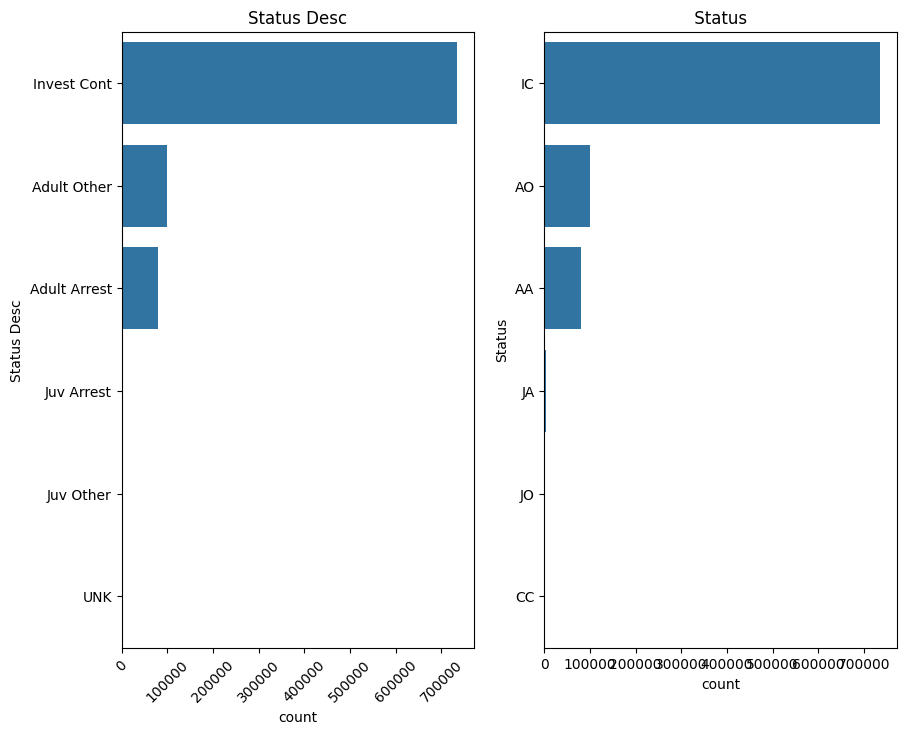

In [8]:
#df=data.groupby(['Status Desc']).size().reset_index(name='conteo')

df=pd.DataFrame(data.copy())
data_num=pd.DataFrame(data.copy())

plt.figure(figsize=(10, 8))
a1=plt.subplot(121)
sns.countplot(df['Status Desc'],order=data_num['Status Desc'].value_counts().index)
a1.set_title('Status Desc')
plt.xticks(rotation=45)


a2=plt.subplot(122)
sns.countplot(df['Status'],order=data_num['Status'].value_counts().index)
a2.set_title(' Status ')
plt.show()

* Las columnas Status Desc  y Status  entregan la misma  información

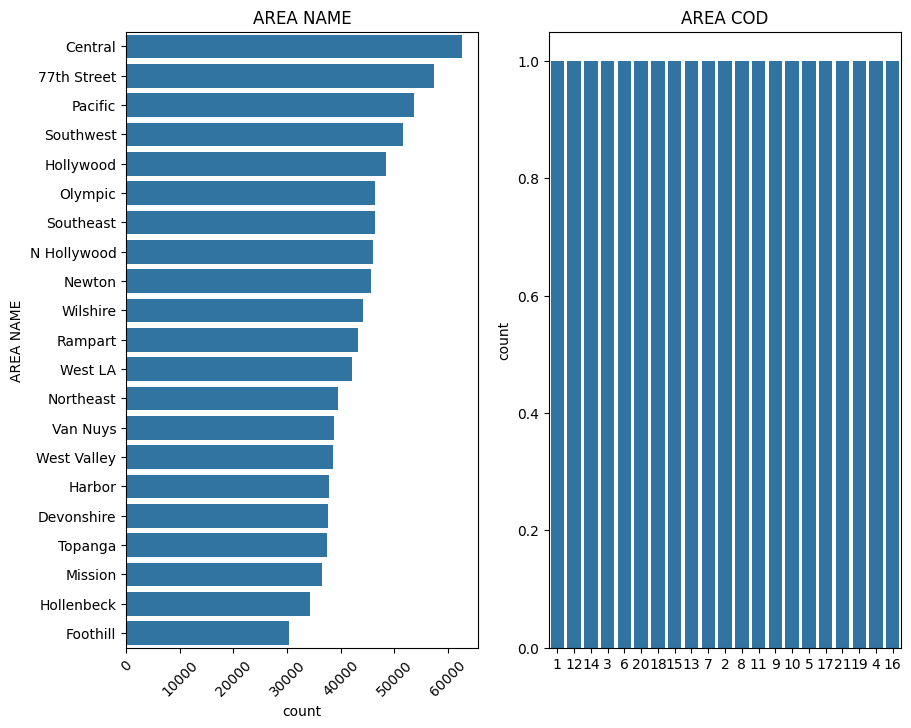

In [9]:
df=data_num=pd.DataFrame(data.copy())

plt.figure(figsize=(10, 8))
a1=plt.subplot(121)
sns.countplot(df['AREA NAME'], order=data_num['AREA NAME'].value_counts().index)
a1.set_title('AREA NAME')
plt.xticks(rotation=45)


a2=plt.subplot(122)
sns.countplot(df['AREA'], order=data_num['AREA'].value_counts().index)
a2.set_title('AREA COD')
plt.show()

* Las  columnas  Area y area name   proporcionan la misma  información

In [10]:
df=data.groupby(['LOCATION']).size().reset_index(name='conteo')
df

LOCATION  conteo
0                                 00    17TH       1
1      00    17TH                         AV      10
2      00    17TH                         PL       1
3      00    18TH                         AV      10
4      00    19TH                         AV      17
...                                      ...     ...
65307                                  ZONAL       4
65308        ZONAL                        AV       9
65309        ZONAL                        ST       2
65310                                    ZOO       3
65311        ZOO                          DR      19

[65312 rows x 2 columns]

In [11]:
filtro_lon_cero = data[data['LON'] == 0]
tabla_location_lon_cero = filtro_lon_cero[['LOCATION']]

tabla_location_lon_cero

LOCATION
562     3700    VETERAN                      AV
2405    2400 E  7TH                          ST
2630                                 LANKERSHIM
2916            OLYMPIC                      BL
3091     300    WORLD                        WY
...                                         ...
497938                                    CHASE
705878          WASHINGTON                   BL
714845                                PENDLETON
827930  3800    SHEWOOD                      PL
853733  1900    TRANSIENT                    ST

[2264 rows x 1 columns]

* La  columna LOCATION  da información mas exacta de la ubicación ,  Sin  embargo,  hay entradas con dirección  y no de LON y LAT,  Describe mejor la Ubicación la  columna LOCATION  pero  tiene demaciados  valores  distintos, y  la  ubicación puede restringirse al area, asi que se puede precindir de estas  tres columnas  

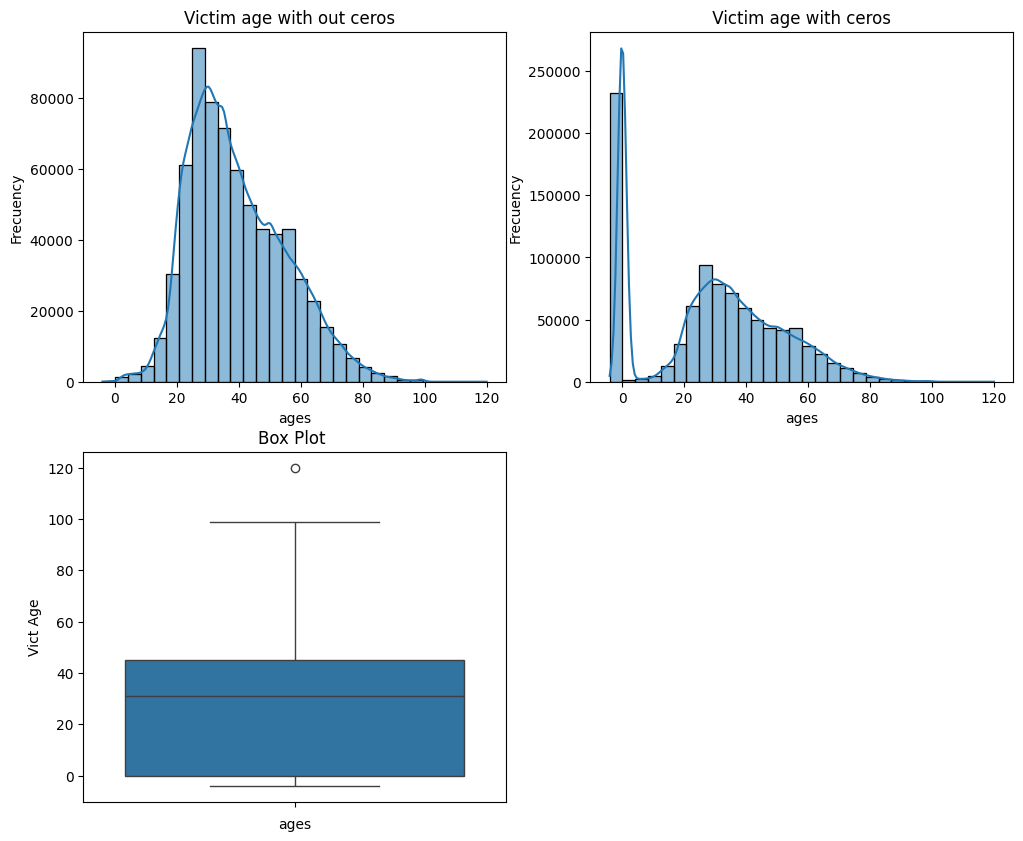

In [12]:
data_nonzero_vict_age = data[data['Vict Age'] != 0]

plt.figure(figsize=(12, 10))
a1=plt.subplot(221)
sns.histplot(data_nonzero_vict_age['Vict Age'], bins=30, kde=True)
a1.set_title('Victim age with out ceros  ')
a1.set_xlabel('ages')
a1.set_ylabel('Frecuency')


a2=plt.subplot(222)
sns.histplot(data['Vict Age'], bins=30, kde=True)
a2.set_title(' Victim age with ceros ')
a2.set_xlabel('ages')
a2.set_ylabel('Frecuency')


a3=plt.subplot(223)
sns.boxplot(data['Vict Age'])
a3.set_title('Box Plot ')
a3.set_xlabel('ages')
plt.show()

*  Para  la edad de la victima  es  necesario  hacer manejo de  outliers , puede hacerse con Z-score   ya que presenta  una  distribución  normalizada,  si se le quitan los ceros
*  Debe hacerse  un analisis  para los datos en cero

# Filtrar datos

In [13]:
data_num=pd.DataFrame(data.copy())

# crear  columna  mes y  años
data_num['MONTH'] = data_num['DATE OCC'].str.split("/").str[0].astype(int)
data_num['YEAR'] = data_num['DATE OCC'].str.split("/").str[2].str.split(" ").str[0]
data_num['YEAR'] = data_num['YEAR'].astype(int)

# eliminar  columnas  no  numericas o  utiles para categorizar
data_num= data_num.drop(["DR_NO","DATE OCC","Date Rptd",'AREA NAME','Rpt Dist No','Crm Cd Desc',"Premis Desc",'Weapon Desc','Status Desc',"Crm Cd 1",'Cross Street','LON','LAT','LOCATION','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Mocodes', 'Weapon Used Cd'], axis=1)

In [14]:
# Pasar a  valor numerico las columnas  categoricas

#Vict sext
# 1: Female 2: Male 0: Unknown
mapeo_diccionario = {'F': 1,'M':2,'X':0}
data_num['Vict Sex'] = data_num['Vict Sex'].map(mapeo_diccionario)


# vict descent , se  cambia las  categorias  por números  y se  re agrupan  en
#1: Asian , 2: Black, 3:Hispanic , 4:american  indian, 5:Pacific Islander , 6:Hawaian, 7:white, 0: other, Unknow

mapeo_diccionario = {'A': 1, 'B': 2,'C': 1, 'D': 0,'F': 1, 'G': 0,'H': 3, 'I': 4,'J': 1, 'K': 1,
                     'L': 1, 'Others': 0,'P': 5,'S': 6, 'U': 6,'V': 1,'W': 7, 'X': 0,'Z': 1,'-':0}
data_num['Vict Descent'] = data_num['Vict Descent'].map(mapeo_diccionario)

#Status
#1=Adult Arrest, 2=Adult Other, 3:Invest Cont, 4:Juv Arrest , 5:Juv Other 0: unkonw
mapeo_diccionario = {'AA': 1,'AO':2,'IC':3,'JA':4,'JO':5,'CC':0}
data_num['Status'] = data_num['Status'].map(mapeo_diccionario)



In [15]:
# manejo de NaNs
modasex = data_num['Vict Sex'].mode().iloc[0]
data_num['Vict Sex'] = data_num['Vict Sex'].fillna(modasex)

modadesc = data_num['Vict Descent'].mode().iloc[0]
data_num['Vict Descent'] = data_num['Vict Descent'].fillna(modadesc)

data_num['Premis Cd'] = data_num['Premis Cd'].fillna(0)

#crm cd 2,3,4


In [16]:
#Manejo de  Outliers

def z_score(df_serie):
  smean = sts.mean(df_serie)
  ssigma = sts.stdev(df_serie)
  outliers = []
  for value in df_serie:
    if value > smean+2.5*ssigma or value < smean-2.5*ssigma:
      outliers.append(value)
  return len(outliers), set(outliers), df_serie.name, df_serie.count()


def iqr_(df_serie):
  quant = np.quantile(df_serie, [0.25, 0.75])
  iqr = quant[1]-quant[0]
  outliers = []
  for value in df_serie:
    if value > quant[1]+1.5*iqr or value < quant[0]-1.5*iqr:
      outliers.append(value)
  return len(outliers), set(outliers), df_serie.name, df_serie.count()

def print_outliers(outtuple):
  print(f'The number of outliers in the **{outtuple[2]}** series is {outtuple[0]}, which represents {outtuple[0]*100/outtuple[3]}%\nthe outlier values are {outtuple[1]}\n\n')


In [17]:
data_nonzero_vict_age = data_num[data_num['Vict Age'] != 0]
vict_age_z_score =z_score(data_nonzero_vict_age['Vict Age'])
print_outliers(vict_age_z_score)
datos_a_eliminar = vict_age_z_score[1]
data_num = data_num[~data_num['Vict Age'].isin(datos_a_eliminar)]


The number of outliers in the **Vict Age** series is 9124, which represents 1.3290933642930707%
the outlier values are {79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, -2, 120, -4, -3, -1}




In [18]:
data_num.head()
#data_num.isna().sum()
#data_num.info()
#data_num.describe()

TIME OCC  AREA  Part 1-2  Crm Cd  Vict Age  Vict Sex  Vict Descent  \
0      2130     7         1     510         0       2.0           3.0   
1      1800     1         1     330        47       2.0           3.0   
2      1700     3         1     480        19       0.0           0.0   
3      2037     9         1     343        19       2.0           3.0   
4      1200     6         2     354        28       2.0           3.0   

   Premis Cd  Status  MONTH  YEAR  
0      101.0       1      3  2020  
1      128.0       3      2  2020  
2      502.0       3     11  2020  
3      405.0       3      3  2020  
4      102.0       3      8  2020

In [19]:
data_string=pd.DataFrame(data.copy())
data_string= data_string.drop(["DR_NO","DATE OCC","Date Rptd","AREA NAME","Crm Cd 1",'LON','LAT','TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status','Status Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1)

data_string.head()

Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                         THEFT OF IDENTITY   

                                    Premis Desc Weapon Desc  \
0                                        STREET         NaN   
1             BUS STOP/LAYOVER (ALSO QUERY 124)         NaN   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)         NaN   
3                                CLOTHING STORE         NaN   
4                                      SIDEWALK         NaN   

                                   LOCATION Cross Street  
0   1900 S  LONGWOOD                     AV          NaN  
1   1000 S  FLOWER                       ST          NaN  
2   1400 W  37TH                         ST          NaN  
3  14000    RIVERSIDE                    DR          NaN  
4                         1900    TRANSIENT          NaN

# Análisis

# crimenes  por mes-año

In [20]:
f_conteo = data_num.groupby(['YEAR', 'MONTH']).size().reset_index(name='conteo')
f_conteo = f_conteo.pivot(columns='YEAR',index='MONTH',values='conteo')
f_conteo

YEAR      2020     2021     2022     2023     2024
MONTH                                             
1      18313.0  16445.0  18309.0  19654.0  18324.0
2      17110.0  15281.0  17564.0  18237.0  16579.0
3      15994.0  16161.0  19535.0  18905.0   8090.0
4      15534.0  15926.0  19590.0  18644.0      NaN
5      17071.0  16823.0  20248.0  18641.0      NaN
6      16887.0  17013.0  20019.0  18439.0      NaN
7      16973.0  18493.0  19776.0  19660.0      NaN
8      16723.0  18185.0  19914.0  19776.0      NaN
9      15497.0  18202.0  19111.0  18998.0      NaN
10     16349.0  19150.0  20094.0  19749.0      NaN
11     15435.0  18186.0  18501.0  18735.0      NaN
12     15832.0  17762.0  19781.0  19101.0      NaN

In [21]:
f_conteo.iloc[:, :-1].describe() # se quita el año 2024

YEAR           2020          2021          2022          2023
count     12.000000     12.000000     12.000000     12.000000
mean   16476.500000  17302.250000  19370.166667  19044.916667
std      863.405572   1196.336767    832.912615    543.075829
min    15435.000000  15281.000000  17564.000000  18237.000000
25%    15757.500000  16374.000000  18958.500000  18643.250000
50%    16536.000000  17387.500000  19683.000000  18951.500000
75%    16997.500000  18190.000000  19940.250000  19655.500000
max    18313.000000  19150.000000  20248.000000  19776.000000

In [22]:
f_conteo_cont = data_num.groupby(['YEAR', 'MONTH']).size().reset_index(name='conteo')
f_conteo_cont['MONTH'] = f_conteo_cont['MONTH'].astype(str)

for i in f_conteo_cont['MONTH']:
    if len(i) == 1:
        f_conteo_cont.loc[f_conteo_cont['MONTH'] == i, 'MONTH'] = '0' + i

f_conteo_cont['Year_month'] = f_conteo_cont['YEAR'].astype(str)+f_conteo_cont['MONTH'].astype(str)
f_conteo_cont_plot = f_conteo_cont[f_conteo_cont['YEAR']!=2024]
f_conteo_cont_plot = f_conteo_cont_plot.drop(['YEAR','MONTH'], axis=1)
f_conteo_cont_plot.tail()

conteo Year_month
43   19776     202308
44   18998     202309
45   19749     202310
46   18735     202311
47   19101     202312

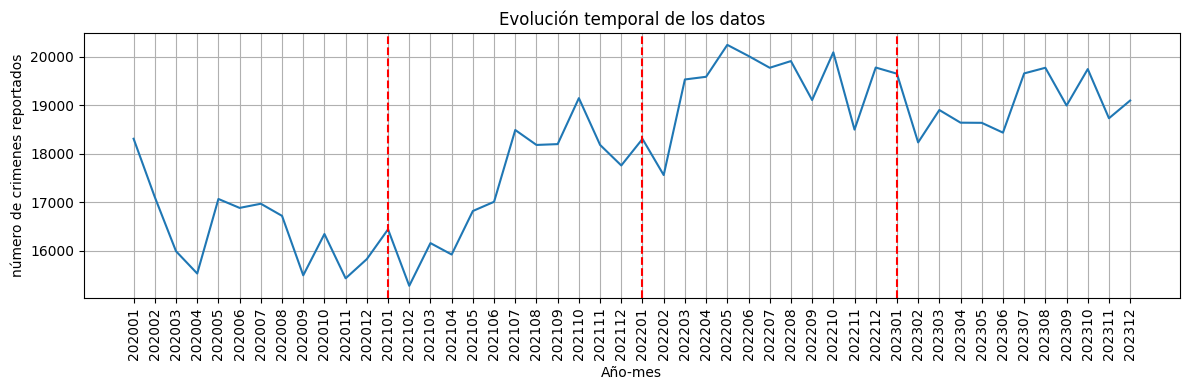

In [23]:
plt.figure(figsize=(12, 4))
sns.lineplot(x=f_conteo_cont_plot['Year_month'], y=f_conteo_cont_plot['conteo'], markers=True, dashes=False)
plt.axvline(x='202101', color='red', linestyle='--', linewidth=1.5)
plt.axvline(x='202201', color='red', linestyle='--', linewidth=1.5)
plt.axvline(x='202301', color='red', linestyle='--', linewidth=1.5)
plt.title('Evolución temporal de los datos')
plt.xlabel('Año-mes')
plt.ylabel('número de crimenes reportados')
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()

# Regresión Lineal número de crímenes siguientes dos meses

In [24]:
def Sxx(x):
  x_prom=np.average(x)

  S_xx=0
  for  i  in x:
    S_xx+=(i-x_prom)**2
  return S_xx

def Sxy(x,y):
  xsum=sum(x)
  ysum=sum(y)

  x_times_y = np.vectorize(lambda a, b: a * b)
  xysum= sum(x_times_y(x, y))

  S_xy=xysum-(xsum*ysum/len(x))
  return S_xy

def regresionLineal(x,y):
  B1=Sxy(x,y)/Sxx(x)
  B0=np.average(y)-(B1*np.average(x))
  return B0,B1

def modelo(x, y_train, size):
    y_pred = []
    x_mod = x[len(y_train):]
    B_0, B_1 = regresionLineal(x[:len(y_train)], y_train)
    for i in range(size):
        y_pred.append(B_0 + (B_1 * x_mod[i]))
    return y_pred, B_0, B_1


def error_cuadratico_real(y_test,y_pred):
  e = 0
  for i in range(len(y_test)):
    e = e + np.sqrt((y_test[i]-y_pred[i])**2)
  return e

In [25]:
f_conteo_cont['Year_month'] = f_conteo_cont['Year_month'].astype(int)
y_train = f_conteo_cont[f_conteo_cont['YEAR']!=2024]['conteo'].values
y_test = f_conteo_cont[f_conteo_cont['YEAR']==2024]['conteo'].values
y_test = y_test[:-1]
x = f_conteo_cont['Year_month'].values
f_conteo_cont['Year_month'] = f_conteo_cont['Year_month'].astype(str)

y_pred, B0, B1 = modelo(x, y_train, 2)
y_pred1=(B0 + (B1 * x))
y_pred, B0, B1

([20450.597186792875, 20460.421885580057],
 -1968078.262032418,
 9.824698787156244)

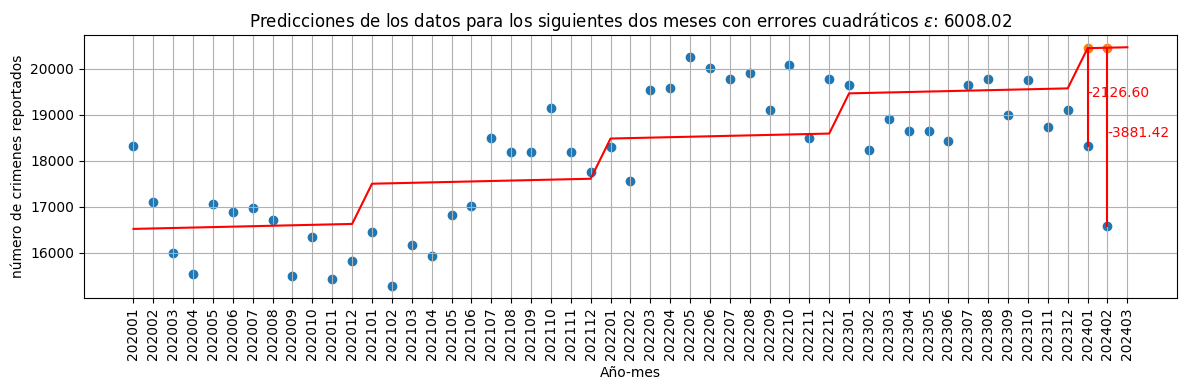

In [26]:
x = x.astype(str)
plt.figure(figsize=(12, 4))
plt.scatter(x=f_conteo_cont['Year_month'][:-1], y=f_conteo_cont['conteo'][:-1], label='Train data')

for i in range(2):
    color = 'green' if y_test[i] - y_pred[i] > 0 else 'red'
    plt.plot([x[i + len(y_train)], x[i + len(y_train)]], [y_test[i], y_pred[i]], color=color)

    diff = y_test[i] - y_pred[i]
    plt.text(x[i + len(y_train)], (y_test[i] + y_pred[i]) / 2, f'{diff:.2f}', color=color)

plt.scatter(x=x[len(y_train):-1], y = y_pred, label='Predicted data')
plt.plot(x, y_pred1,"red", label='Linear regression')
plt.title('Evolución temporal de los datos')
plt.xlabel('Año-mes')
plt.ylabel('número de crimenes reportados')
epsilon = error_cuadratico_real(y_test, y_pred)
plt.title('Predicciones de los datos para los siguientes dos meses con errores cuadráticos $\\epsilon$: {:.2f}'.format(epsilon))
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para que sean legibles
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis de edad

In [27]:
data_vict_age=data_num[data_num['Vict Age']==0]
data_vict_age.groupby(['Vict Age', 'Vict Sex']).size().reset_index(name='conteo')

Vict Age  Vict Sex  conteo
0         0       0.0   75639
1         0       1.0    3707
2         0       2.0  152614

In [28]:
data_vict_age.groupby(['Vict Age', 'Vict Descent']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)


Vict Age  Vict Descent  conteo
3         0           3.0  138636
0         0           0.0   77855
7         0           7.0   13556
2         0           2.0    1490
1         0           1.0     382
6         0           6.0      39
4         0           4.0       1
5         0           5.0       1

In [29]:
data_vict_age.groupby(['Vict Age', 'Premis Cd']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

Vict Age  Premis Cd  conteo
1           0      101.0  106144
54          0      203.0   22262
8           0      108.0   19632
114         0      404.0    7080
130         0      502.0    5157
..        ...        ...     ...
168         0      715.0       1
268         0      946.0       1
190         0      737.0       1
269         0      947.0       1
292         0      975.0       1

[293 rows x 3 columns]

In [30]:
codigos= [101, 203, 108, 404, 502]
data[data['Premis Cd'].isin(codigos)].groupby(['Premis Desc']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

Premis Desc  conteo
4                                        STREET  232875
1  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  112122
3                                   PARKING LOT   63461
2                                OTHER BUSINESS   43776
0                              DEPARTMENT STORE   11850

In [31]:
data_vict_age.groupby(['Vict Age', 'Crm Cd']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

Vict Age  Crm Cd  conteo
53          0     510   98305
27          0     420   20337
12          0     310   17643
38          0     442   16380
76          0     740   13736
..        ...     ...     ...
2           0     122       1
44          0     451       1
19          0     347       1
117         0     924       1
41          0     445       1

[134 rows x 3 columns]

In [32]:
codigos= [510, 420, 310, 442, 740] # los  codigos  hacen parte  de los  delitos de  Property Crimes
data[data['Crm Cd'].isin(codigos)].groupby(['Crm Cd Desc']).size().reset_index(name='conteo').sort_values(by='conteo', ascending=False)

Crm Cd Desc  conteo
4                                   VEHICLE - STOLEN   98614
0                                           BURGLARY   56319
3  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   55705
2    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)   35391
1           SHOPLIFTING - PETTY THEFT ($950 & UNDER)   23914

* Se hace un análisis para determinar si los valores 'cero' en la columna edad de las víctimas tiene relación con alguna de las otras columnas o simplemente son valores nulos.

* Con el análisis anterior se evidencia que:
    * Las edades en cero para sexo, ascendencia de la víctima tiene gran cantidad de datos en cero para los tres tipos de registro
 
    * Para el premise code, siendo este el lugar en el que ocurrió el crímen, los datos de edades en cero están dispersos y lo que mayor recurrencia tienen son referentes a la calle y vehículos.
 
    * Con respecto a los crime codes, se ve que no guardan relación con infantes. Los de mayor recurrencia guardan relación con delitos de property crimes según la documentación [3]
 
* Dado que los datos no muestran que los valores en cero guarden relación con infantes, podemos asumir que se trata de valores nulos y prescindir de ellos para las regresiones.

# Regresión Lineal para la Edad de la Victima

In [34]:
data_vict_age = data_num[data_num['Vict Age']!=0]
data_vict_age = data_vict_age['Vict Age']
X = data_num[data_num['Vict Age']!=0]
X = X.drop(['Vict Age'], axis=1).values

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data_vict_age, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizamos las  predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 213.21801790457266
R-squared: 0.028883738701069972


In [35]:
# Obtenemos los coeficientes calculados del modelo y  organizamos  las  columnas por nivel de importancia
coeficientes = regression_model.coef_

feature_importances = pd.DataFrame({'Feature': data_num.drop(['Vict Age'], axis=1).columns, 'Coefficient': coeficientes})
feature_importances['Absolute Coefficient'] = np.abs(feature_importances['Coefficient'])
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

print("Importancia de las características:")
print(feature_importances)


Importancia de las características:
        Feature  Coefficient
4      Vict Sex     2.676236
5  Vict Descent     0.896002
7        Status     0.804842
2      Part 1-2     0.293776
1          AREA     0.084441
9          YEAR    -0.034558
8         MONTH     0.007641
6     Premis Cd     0.000976
0      TIME OCC    -0.000353
3        Crm Cd     0.000266


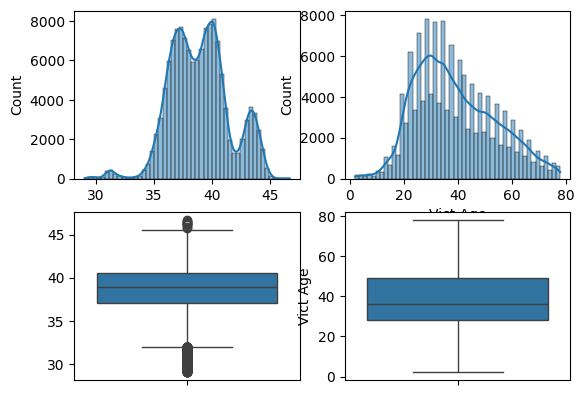

In [36]:
a2_1=plt.subplot(221)
sns.histplot(y_pred, bins=50, kde=True)
a2.set_title(' Victim age with pred')
a2.set_xlabel('ages')
a2.set_ylabel('Frecuency')

a2_2=plt.subplot(222)
sns.histplot(y_test, bins=50, kde=True)
a2.set_title(' Victim age with true')
a2.set_xlabel('ages')
a2.set_ylabel('Frecuency')


a3_1=plt.subplot(223)
sns.boxplot(y_pred)
a3.set_title('Box Plot pred')
a3.set_xlabel('ages')

a3_2=plt.subplot(224)
sns.boxplot(y_test)
a3.set_title('Box Plot true')
a3.set_xlabel('ages')
plt.show()

* Como se puede ver por los valores obtenidos de las métricas para la evaluación del modelo, Mean Squared Error: 213.21 R-squared: 0.028, reflejan un mal ajuste para una regresión lineal. Sin embargo, en las gráficas podemos observar que la mayoría de datos predichos se encuentran cercanos a la media de los datos reales. Por este motivo, hacemos un análisis por 'buckets' de edades y una regresión Logística para clasificación para revisar el desempeño de este modelo.

In [37]:
data_vict_age = data_num[data_num['Vict Age']!=0]
data_vict_age = data_vict_age['Vict Age']

bins = [0, 12, 18, 30, 45, 60, float('inf')]
 
labels = [1, 2, 3, 4, 5, 6]
 
data_vict_age = pd.cut(data_vict_age, bins=bins, labels=labels, right=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metr

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1233
           2       0.00      0.00      0.00      3610
           3       0.39      0.11      0.17     36355
           4       0.37      0.93      0.53     49445
           5       0.00      0.00      0.00     29539
           6       0.00      0.00      0.00     15290

    accuracy                           0.37    135472
   macro avg       0.13      0.17      0.12    135472
weighted avg       0.24      0.37      0.24    135472

Confusion Matrix:


Text(0.5, 1.0, 'Confusion matrix')

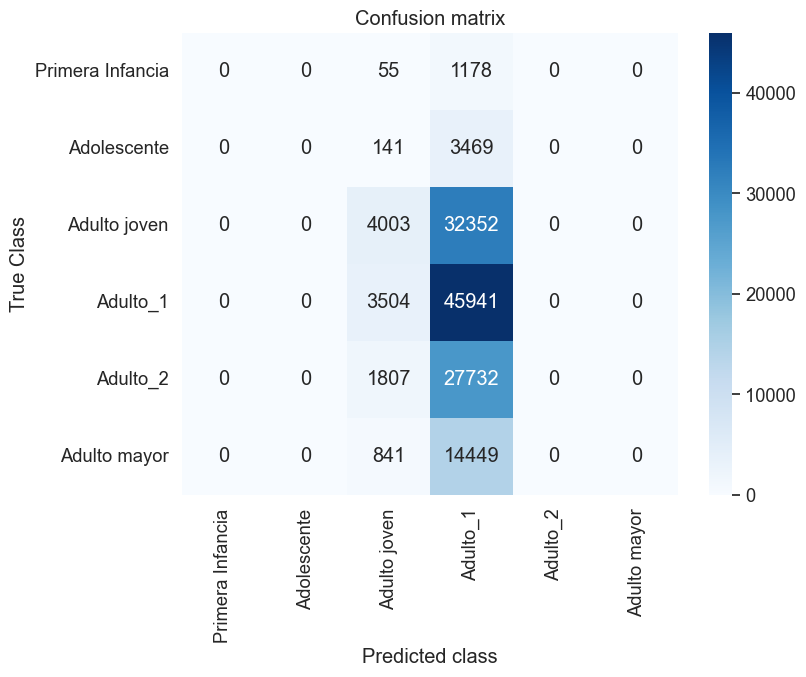

In [50]:
X = data_num[data_num['Vict Age']!=0]
X = X.drop(['Vict Age'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, data_vict_age, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter = 500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Primera Infancia', 'Adolescente', 'Adulto joven', 'Adulto_1', 'Adulto_2', 'Adulto mayor']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True Class')
plt.title('Confusion matrix')

Podemos ver que ni la regresión Lineal, ni la logística ajustan a los datos de prueba. Por lo tanto podemos inferir que la edad no es una variable que se pueda predecir a partir de los demás datos para este conjunto, puesto que predice valores cercanos al promedio de la edad. 

# Regresión Logística para el género de la víctima

Hacemos  primero una regresión logistica con todos los  datos  para ver  el tipo de ajuste que da e intentar mejorarlo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     16860
         1.0       0.55      0.41      0.47     66418
         2.0       0.65      0.77      0.71     98586

    accuracy                           0.65    181864
   macro avg       0.71      0.70      0.70    181864
weighted avg       0.64      0.65      0.64    181864

Confusion Matrix:


Text(0.5, 1.0, 'Confusion matrix')

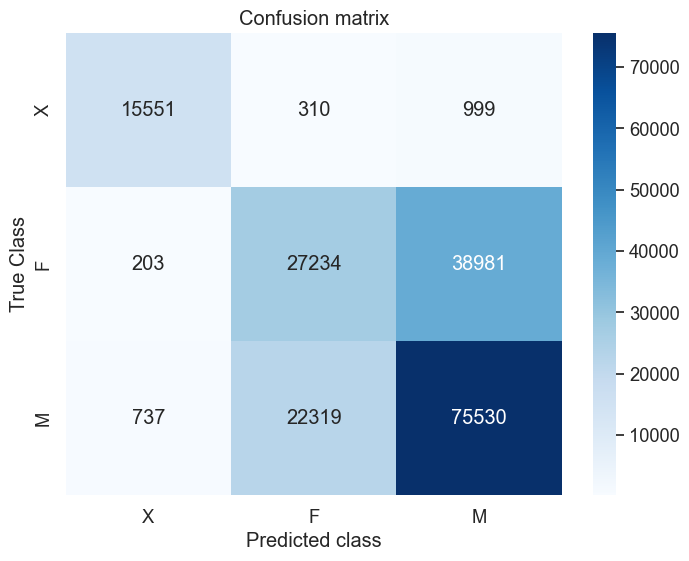

In [42]:

data_vict_sex = data_num['Vict Sex']


X_stack = data_num.drop(['Vict Sex'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_stack, data_vict_sex, test_size=0.20, random_state=42)

logreg = LogisticRegression(max_iter = 500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# imprimimos una  matriz de confución pra  analizar mejor el modelo creado
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['X', 'F', 'M']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True Class')
plt.title('Confusion matrix')

Según los resultados de las métricas del modelo, el modelo se comporta mejor para clasificar los X y un poco mejor para clasificar los masculinos que los femeninos. Esto se puede evidenciar en los valores de las métricas de Recall, precision y f1-score calculadas para cada una de las categorías.

In [51]:
coeficientes = logreg.coef_[0]

feature_importances = pd.DataFrame({'Feature': data_num.drop(['Vict Sex'], axis=1).columns, 'Coefficient': coeficientes})

feature_importances['Absolute Coefficient'] = np.abs(feature_importances['Coefficient'])
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

print("Importancia de las características:")
print(feature_importances)

Importancia de las características:
        Feature  Coefficient
1          AREA     0.003732
5  Vict Descent    -0.003097
9          YEAR    -0.001921
7        Status    -0.001714
6     Premis Cd     0.001619
3        Crm Cd     0.001466
8         MONTH    -0.000918
2      Part 1-2     0.000648
4      Vict Age    -0.000152
0      TIME OCC     0.000098


Escogemos   solo  4  columnas teniendo en cuenta  el orden  de  importancia que se obtinen a partir de los coeficientes obtenidos para la regresión lineal. Probaremos un nuevo modelo y revisaremos su desempeño.

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     16860
         1.0       0.52      0.33      0.40     66418
         2.0       0.64      0.79      0.70     98586

    accuracy                           0.64    181864
   macro avg       0.70      0.70      0.69    181864
weighted avg       0.62      0.64      0.62    181864

Confusion Matrix:


Text(0.5, 1.0, 'Confusion matrix')

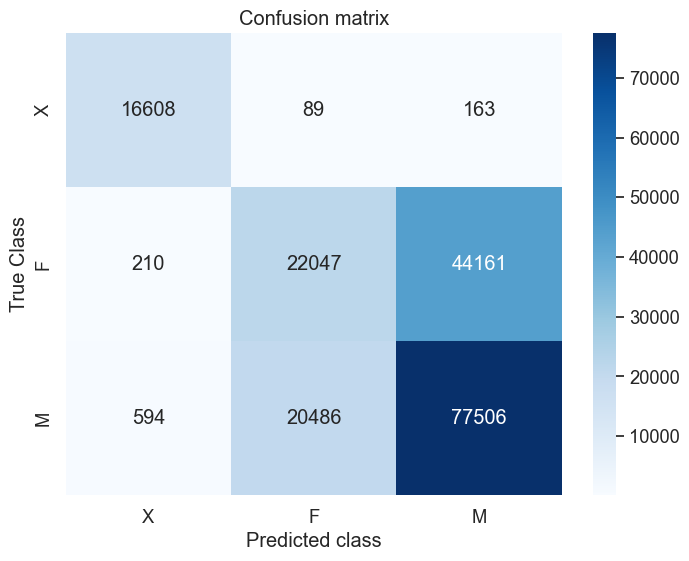

In [44]:
data_vict_sex = data_num['Vict Sex']

X_stack = data_num[['Vict Age', 'Vict Descent', 'Premis Cd', 'AREA']].values

X_train, X_test, y_train, y_test = train_test_split(X_stack, data_vict_sex, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)

# Definir etiquetas para las clases
labels = ['X', 'F', 'M']

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Tamaño de la fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted class')
plt.ylabel('True Class')
plt.title('Confusion matrix')

Vemos que el desempeño del modelo es similar cuando tiene en cuenta todas las categorías vs cuando tiene en cuenta solo las cuatro escogidas

Como método de validación cruzada, se escogió el **k-folds:**

 La validación cruzada,  es una técnica utilizada en el aprendizaje automático para evaluar el rendimiento de un modelo predictivo. Se enfoca en el método de validación cruzada conocido como k-fold cross-validation.
En la validación cruzada, se divide el conjunto de datos de entrenamiento en k subconjuntos disjuntos de tamaño aproximadamente igual, llamados "fold" (pliegues). Luego, se entrena el modelo utilizando k-1 de estos pliegues como conjunto de entrenamiento, y el pliegue restante se utiliza como conjunto de validación. Este proceso se repite k veces, de manera que cada pliegue sirve una vez como conjunto de validación.
El rendimiento del modelo se evalúa calculando la medida de rendimiento (por ejemplo, precisión) en cada conjunto de validación y luego promediando estos resultados para obtener una medida de rendimiento generalizada llamada "cross-validated performance". Esto ayuda a evitar el sobreajuste del modelo a un conjunto de datos específico y proporciona una estimación más realista del rendimiento del modelo en datos no vistos[6]

In [45]:
scores = cross_val_score(logreg, X_stack, data_vict_sex, cv=5)

print("Puntajes de precisión para cada pliegue:", scores)
print("Precisión media:", scores.mean())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Puntajes de precisión para cada pliegue: [0.63609071 0.63785576 0.63764131 0.6388895  0.64119694]
Precisión media: 0.6383348449357157


Se puede ver que sin importar la partición de los datos de entrenamiento, la precisión es bastante parecida a la de los datos anteriores

# Regresión Polinomial para el Número de Crímenes por área y por Mes

In [46]:
f_conteo_cont = data_num.groupby(['YEAR', 'MONTH', 'AREA']).size().reset_index(name='conteo')
f_conteo_cont['MONTH'] = f_conteo_cont['MONTH'].astype(str)

for i in f_conteo_cont['MONTH']:
    if len(i) == 1:
        f_conteo_cont.loc[f_conteo_cont['MONTH'] == i, 'MONTH'] = '0' + i

f_conteo_cont_plot = f_conteo_cont.copy()
f_conteo_cont_plot['Year_month'] = f_conteo_cont['YEAR'].astype(str)+f_conteo_cont['MONTH'].astype(str)
f_conteo_cont_plot = f_conteo_cont_plot[f_conteo_cont['YEAR']!=2024]
f_conteo_cont_plot = f_conteo_cont_plot.pivot(columns='AREA', index=['Year_month'], values='conteo')
f_conteo_cont_plot = f_conteo_cont_plot.sort_values(by=['Year_month'])

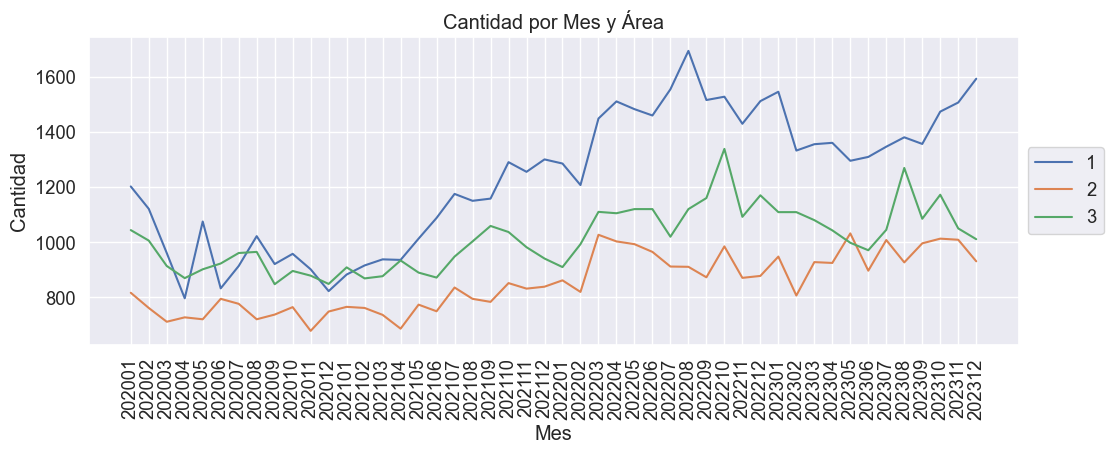

In [47]:
fig, ax = plt.subplots(figsize=(12, 4))
 
for area in f_conteo_cont_plot[[1,2,3]].columns:
    ax.plot(f_conteo_cont_plot.index.get_level_values('Year_month'), f_conteo_cont_plot[area], label=area)
 
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad por Mes y Área')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
 
plt.show()

Nos damos cuenta que el comportamiento del conteo por mes es similar para las distintas áreas

In [48]:
f_conteo_cont = data_num.groupby(['YEAR', 'MONTH', 'AREA']).size().reset_index(name='conteo')
f_conteo_cont = f_conteo_cont.pivot(columns='AREA', index=['YEAR', 'MONTH'], values='conteo')
f_conteo_cont['YEAR_'] = f_conteo_cont.index.get_level_values('YEAR')
f_conteo_cont['MONTH_'] = f_conteo_cont.index.get_level_values('MONTH')
f_conteo_cont = f_conteo_cont.sort_values(by=['YEAR', 'MONTH'])

In [54]:
X = f_conteo_cont[['YEAR_', 'MONTH_']]
y = f_conteo_cont.drop(f_conteo_cont[['YEAR_', 'MONTH_']], axis=1)
 
grado = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = make_pipeline(PolynomialFeatures(grado), LinearRegression())
modelo.fit(X_train, y_train)
 
predicciones = modelo.predict(X_test)

predicciones = pd.DataFrame(predicciones)
MSEmse = mean_squared_error(y_test, predicciones)
MAEmae = mean_absolute_error(y_test, predicciones)
print('Evaluación del modelo:\nMean Squared Error: {:.2f}\nMean absolute error: {:.2f}'.format(MSEmse, MAEmae))

Evaluación del modelo:
Mean Squared Error: 5319.85
Mean absolute error: 53.54


Vemos que los errores son bajos en comparación con las escalas usadas en los conteos. Lo que indica que el modelo ajusta bien.

In [55]:
y_test['MONTH_'] = y_test.index.get_level_values('MONTH').astype(str)
for i in y_test['MONTH_']:
    if len(i) == 1:
        y_test.loc[y_test['MONTH_'] == i, 'MONTH_'] = '0' + i
y_test['Year_month'] = y_test.index.get_level_values('YEAR').astype(str)+y_test['MONTH_'].astype(str)
y_test = y_test.drop('MONTH_', axis=1)
y_test['Year_month'] = y_test['Year_month'].astype(int)
y_test = y_test.sort_values(by='Year_month')
y_test['Year_month'] = y_test['Year_month'].astype(str)

nuevos_nombres = {i: i + 1 for i in range(21)} 
predicciones = predicciones.rename(columns=nuevos_nombres)
    
predicciones['Year_month'] = y_test['Year_month'].values

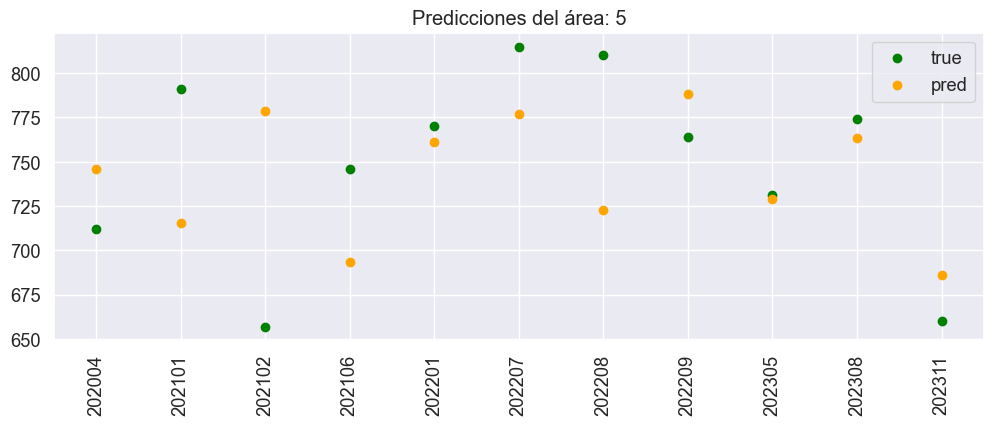

In [56]:
plt.figure(figsize=(12, 4))

area = 5
plt.scatter(y_test['Year_month'], y_test[area], label='true', color= 'green')
plt.scatter(y_test['Year_month'], predicciones[area], label='pred', color= 'orange')
plt.title(f'Predicciones del área: {area}')
plt.xticks(rotation=90)
plt.legend()

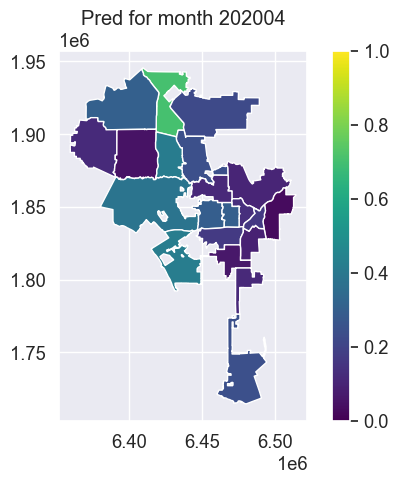

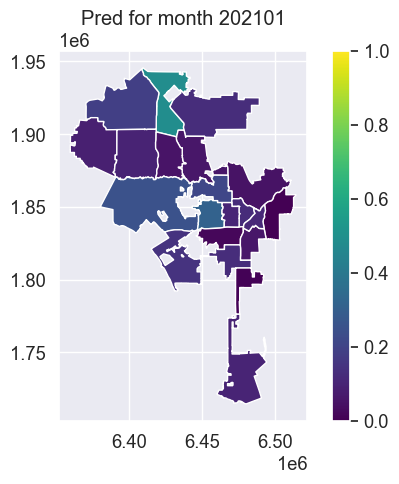

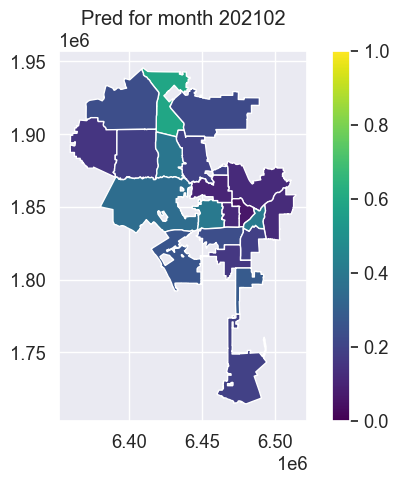

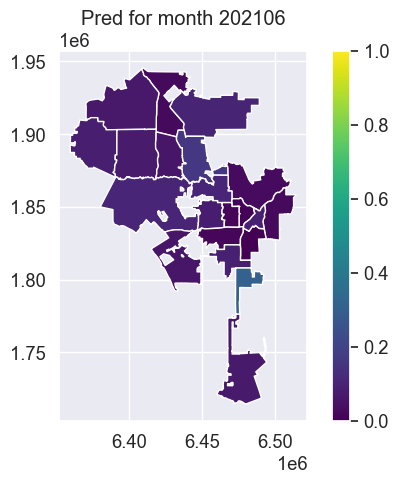

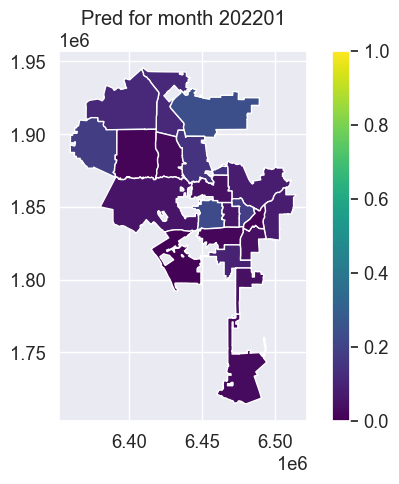

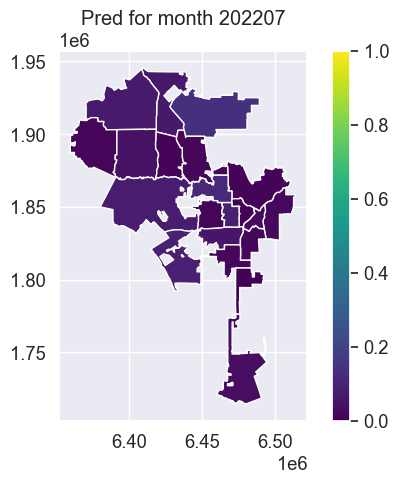

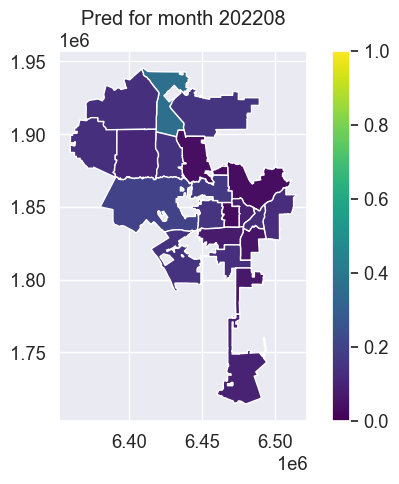

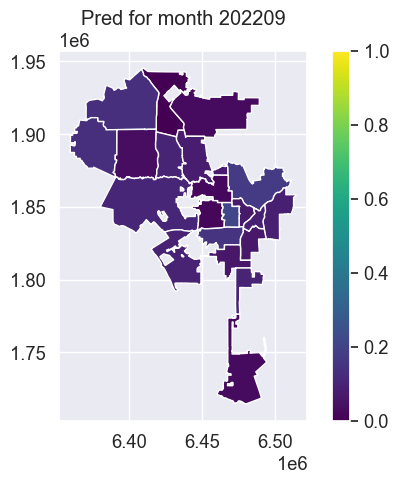

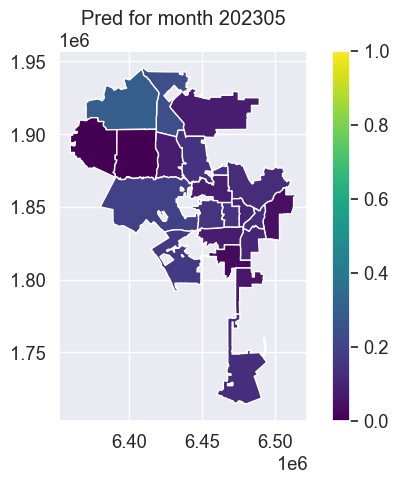

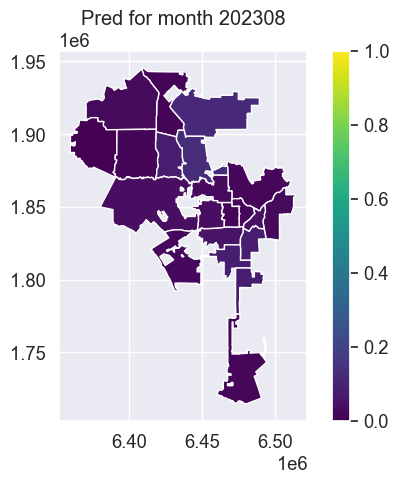

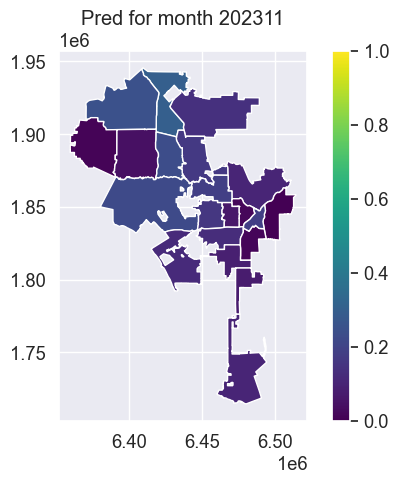

In [57]:
for x in y_test['Year_month']:
    mes_pred = x
    conteo_pred_real = y_test.loc[y_test['Year_month'] == mes_pred]
    conteo_pred_real = conteo_pred_real.drop('Year_month', axis=1).values
    
    conteo_pred = predicciones.loc[predicciones['Year_month'] == mes_pred]
    conteo_pred = conteo_pred.drop('Year_month', axis=1).values
    
    conteo_error = np.abs((conteo_pred_real-conteo_pred)/conteo_pred_real)
    lapd_map = gpd.read_file('LAPD_Division.geojson')
    pred_by_area = pd.DataFrame()
    pred_by_area['OBJECTID'] = lapd_map['OBJECTID']
    pred_by_area['conteo'] = conteo_error[0]
    
    lapd_map = lapd_map.merge(pred_by_area, how='left', left_on='OBJECTID', right_on='OBJECTID') 
    
    lapd_map.plot(column='conteo', cmap='viridis', legend=True, vmin=0, vmax=1)
    plt.title(f'Pred for month {x}')
    plt.show()

Como vemos en la gráfica de áreas por cada uno de los meses de prueba, los errores relativos son bajos en general para todas las áreas, por lo que podemos inferir que el modelo ajusta bien para esta predicción.

El mapa se realizó teniendo en cuenta las áreas de jurisdicción de la polícia de Los Ángeles. [7]

# Referencias

[1] https://drive.google.com/file/d/1D4SRYpyFxmxLVXdZmWwrR-WYja3eS-zt/view?usp=sharing   archivo cvs  con los  datos

[2] https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data  descripcion  y origen de la data

[3] pdf  UCR-COMPSTAT062618

[4] pdf  MO_CODES_Numerical_20191119

[5] pdf  UCR_Manual

[6] Berrar, D. (2018). Cross-Validation. En D. Berrar (Ed.), Encyclopedia of Bioinformatics and Computational Biology (p. 1-9). Elsevier. DOI: 10.1016/B978-0-12-809633-8.20349-X

[7] https://geohub.lacity.org/datasets/lahub::lapd-divisions/about